In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings

Congratulations! You’ve just started working at the hottest new tech startup, FetchMaker. FetchMaker’s mission is to match up prospective dog owners with their perfect pet. FetchMaker has been collecting data on their adoptable dogs, and it’s your job to analyze some of that data.

1.
FetchMaker has provided us with data for a sample of dogs from their app, including the following attributes:

weight, an integer representing how heavy a dog is in pounds
tail_length, a float representing tail length in inches
age, in years
color, a String such as "brown" or "grey"
is_rescue, a boolean 0 or 1
The data has been saved for you as a pandas DataFrame named dogs. Use the .head() method to inspect the first five rows of the dataset.

In [2]:
# Import data
dogs = pd.read_csv('dog_data.csv')

# Subset to just whippets, terriers, and pitbulls
dogs_wtp = dogs[dogs.breed.isin(['whippet', 'terrier', 'pitbull'])]

# Subset to just poodles and shihtzus
dogs_ps = dogs[dogs.breed.isin(['poodle', 'shihtzu'])]
print(dogs.head())

   is_rescue  weight  tail_length  age  color  likes_children  \
0          0       6         2.25    2  black               1   
1          0       4         5.36    4  black               0   
2          0       7         3.63    3  black               0   
3          0       5         0.19    2  black               0   
4          0       5         0.37    1  black               1   

   is_hypoallergenic      name      breed  
0                  0      Huey  chihuahua  
1                  0   Cherish  chihuahua  
2                  1     Becka  chihuahua  
3                  0     Addie  chihuahua  
4                  1  Beverlee  chihuahua  


2.
FetchMaker estimates (based on historical data for all dogs) that 8% of dogs in their system are rescues.
They would like to know if whippets are significantly more or less likely than other dogs to be a rescue.
Store the is_rescue values for 'whippet's in a variable called whippet_rescue.

3.
How many whippets are rescues (remember that the value of is_rescue is 1 for rescues and 0 otherwise)? Save this number as num_whippet_rescues and print it out.

4.
How many whippets are in this sample of data in total? Save this number as num_whippets and print it out.

In [4]:
whippet_rescue = dogs.is_rescue[dogs.breed == 'whippet']
num_whippet_rescues = np.sum(whippet_rescue==1)
num_whippets = len(whippet_rescue)
print(f'The total number of whippets in the sample is {num_whippets}.\nThe number of rescues among the whippets is {num_whippet_rescues}.')

The total number of whippets in the sample is 100.
The number of rescues among the whippets is 6.


5.
Use a hypothesis test to test the following null and alternative hypotheses:

Null: 8% of whippets are rescues

Alternative: more or less than 8% of whippets are rescues

Save the p-value from this test as pval and print it out. Using a significance threshold of 0.05, Is the proportion of whippets who are rescues significantly different from 8%?

In [7]:
warnings.filterwarnings('ignore')

In [8]:
pval = stats.binom_test(x=num_whippet_rescues, n=num_whippets, p=0.08)
print(f'Pval is {pval}.\n')
sig_thres = 0.05
if pval < sig_thres:
    print('''This is lower than the significant threshold, meaning the Null is rejected and there is sigficant difference between the observerd and the
hypothesised percentages.''')
else:
  print('''This is higher than the significant threshold, meaning the Null Hypothesis is true, so there is no significant difference between the observerd
6% and the 8%.''')

Pval is 0.5811780106238109.

This is higher than the significant threshold, meaning the Null Hypothesis is true, so there is no significant difference between the observerd
6% and the 8%.


6.
Three of FetchMaker’s most popular mid-sized dog breeds are 'whippet's, 'terrier's, and 'pitbull's. Is there a significant difference in the average weights of these three dog breeds?

To start answering this question, save the weights of each of these breeds in three separate series named wt_whippets, wt_terriers, and wt_pitbulls, respectively.


7.
Run a single hypothesis test to address the following null and alternative hypotheses:

Null: whippets, terriers, and pitbulls all weigh the same amount on average
Alternative: whippets, terriers, and pitbulls do not all weigh the same amount on average (at least one pair of breeds has differing average weights)
Save the resulting p-value as pval and print it out. Using a significance threshold of 0.05, is there at least one pair of dog breeds that have significantly different average weights?

In [10]:
wt_whippets = dogs.weight[dogs.breed == 'whippet']
wt_terriers = dogs.weight[dogs.breed == 'terrier']
wt_pitbulls = dogs.weight[dogs.breed == 'pitbull']

fstat, pval = stats.f_oneway(wt_whippets, wt_terriers, wt_pitbulls)
print(pval)

3.276415588274726e-17


8.
If you completed the previous step correctly, you should have concluded that at least one pair of dog breeds have significantly different average weights.

Run another hypothesis test to determine which of those breeds (whippets, terriers, and pitbulls) weigh different amounts on average. Use an overall type I error rate of 0.05 for all three comparisons. Note that we’ve already provided you with code in script.py to subset the data to just these breeds and have saved this subset as dogs_wtp using the following code:

dogs_wtp = dogs[dogs.breed.isin(['whippet', 'terrier', 'pitbull'])]

This should make it easier for you to run the test you need!

Print out the results. Which pairs of dog breeds weigh different amounts?

In [11]:
result = pairwise_tukeyhsd(dogs_wtp.weight, dogs_wtp.breed, 0.05)
print(result)
print('1. Pitbull-terrier and 2. terrier-whippet pairs has differences in weight.')

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
pitbull terrier   -13.24    0.0 -16.7278 -9.7522   True
pitbull whippet    -3.34 0.0638  -6.8278  0.1478  False
terrier whippet      9.9    0.0   6.4122 13.3878   True
-------------------------------------------------------
1. Pitbull-terrier and 2. terrier-whippet pairs has differences in weight.


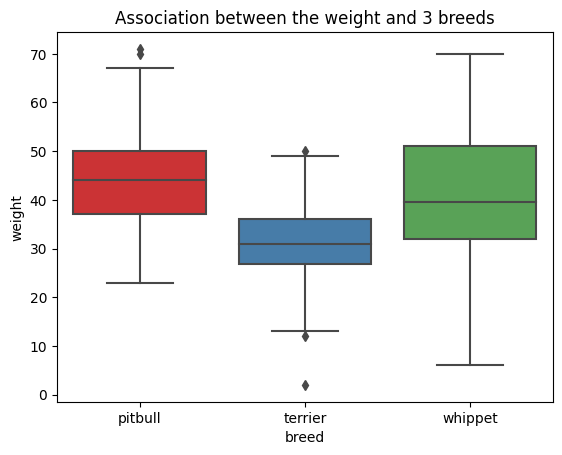

<Figure size 640x480 with 0 Axes>

In [12]:
sns.boxplot(x='breed', y='weight', data=dogs_wtp, palette='Set1')
plt.title('Association between the weight and 3 breeds')
plt.show()
plt.clf()

9.
FetchMaker wants to know if 'poodle's and 'shihtzu's come in different colors. Note that we’ve already provided you with code in script.py to subset the data to just these breeds and have saved this subset as dogs_ps using the following code:
dogs_ps = dogs[dogs.breed.isin(['poodle', 'shihtzu'])]
This should make it easier for you to investigate this question!
To start, use the subsetted data to create a contingency table of dog colors by breed (poodle vs. shihtzu). Save the table as Xtab and print it out.


10.
Run a hypothesis test for the following null and alternative hypotheses:

Null: There is an association between breed (poodle vs. shihtzu) and color.

Alternative: There is not an association between breed (poodle vs. shihtzu) and color.

Save the p-value as pval and print it out. Do poodles and shihtzus come in significantly different color combinations? Use a significance threshold of 0.05.

In [13]:
Xtab = pd.crosstab(dogs_ps.color, dogs_ps.breed)
print(Xtab,'\n')
sig_thres = 0.05
stat, pval_ch, dof, expected = stats.chi2_contingency(Xtab)
if pval_ch < sig_thres:
  print(f'The pval is {pval_ch} which is lower than the significance threshold, meaning that the Null hypothesis is not true and rejected. This also means that there is no association between the colors and the breeds')
else:
  print('The Null hypothesis is true, meaning there is an association between the colors and the breeds.')

breed  poodle  shihtzu
color                 
black      17       10
brown      13       36
gold        8        6
grey       52       41
white      10        7 

The pval is 0.005302408293244593 which is lower than the significance threshold, meaning that the Null hypothesis is not true and rejected. This also means that there is no association between the colors and the breeds


Good learner! Have a treat!
11.
Great job!

Feel free to play around with the FetchMaker data some more and run some hypothesis tests of your own.

The breeds you can explore are "poodle", "rottweiler", "whippet", "greyhound", "terrier", "chihuahua", "shihtzu", and "pitbull".

Extra challenge: Remind yourself of your data visualization skills and your ability to describe the central tendency of the data. For example, a boxplot visualization can add a lot to your understanding of an ANOVA result.

In [14]:
dogs.head()

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
0,0,6,2.25,2,black,1,0,Huey,chihuahua
1,0,4,5.36,4,black,0,0,Cherish,chihuahua
2,0,7,3.63,3,black,0,1,Becka,chihuahua
3,0,5,0.19,2,black,0,0,Addie,chihuahua
4,0,5,0.37,1,black,1,1,Beverlee,chihuahua


In [15]:
dogs.breed.unique()

array(['chihuahua', 'greyhound', 'pitbull', 'poodle', 'rottweiler',
       'shihtzu', 'terrier', 'whippet'], dtype=object)

In [16]:
tail_grey = dogs.tail_length[dogs.breed == 'greyhound']
tail_rott = dogs.tail_length[dogs.breed == 'rottweiler']
tail_chi = dogs.tail_length[dogs.breed == 'chihuahua']

In [17]:
fstat, pval_tail = stats.f_oneway(tail_grey, tail_rott, tail_chi)
print(pval_tail)

2.3561081117217265e-121


In [18]:
dogs_grerotchi = dogs[dogs.breed.isin(['greyhound', 'rottweiler', 'chihuahua'])]

In [19]:
result = pairwise_tukeyhsd(dogs_grerotchi.tail_length, dogs_grerotchi.breed, 0.05)

In [20]:
print(result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2   meandiff p-adj   lower    upper   reject
-------------------------------------------------------------
chihuahua  greyhound  14.9272    0.0  13.9586  15.8958   True
chihuahua rottweiler   1.1623 0.0139   0.1937   2.1309   True
greyhound rottweiler -13.7649    0.0 -14.7335 -12.7963   True
-------------------------------------------------------------


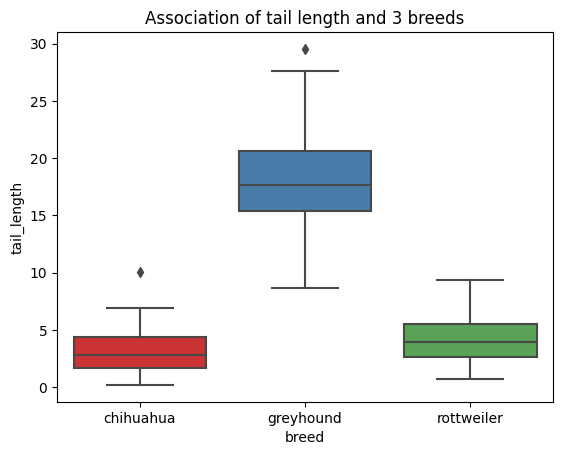

<Figure size 640x480 with 0 Axes>

In [21]:
sns.boxplot(x='breed', y='tail_length', data=dogs_grerotchi, palette='Set1')
plt.title('Association of tail length and 3 breeds')
plt.show()
plt.clf()